In [1]:
import netCDF4 as nc
import numpy as np
# Path to the NetCDF file
nc_file = 'Data_TC/Spatial/Genesis/IBTrACS_Genesis_density.nc'

with nc.Dataset(nc_file, 'r') as ncfile:
    # Extract variables
    latitudes = ncfile.variables['lat'][:]
    longitudes = ncfile.variables['lon'][:]
    track_density = ncfile.variables['track_density'][:]  

    mean_track_density = np.sum(track_density, axis=0)  

    lon_min, lon_max = 0, 360
    lat_min, lat_max = -40, 40

    lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)
    Obs = mean_track_density /20


In [2]:
import netCDF4 as nc
import numpy as np

base_path = 'Data_TC/Spatial/Genesis/'
week_gen_results = {}

for week in range(1, 9):
    
    IAP_CAS_nc_file = f'{base_path}week{week}_lag0_ddaily_Genesis_density_five_degre.nc'

    with nc.Dataset(IAP_CAS_nc_file, 'r') as ncfile:

        gen_density = ncfile.variables['track_density'][:] 
        week_sum = np.sum(gen_density, axis=0)  

        # Scale the sum track density
        week_gen = week_sum / 320 # divide by 16 ensemble * 20 year
        week_gen_results[f'week{week}_gen'] = week_gen

week1_gen = week_gen_results['week1_gen']
week2_gen = week_gen_results['week2_gen']
week3_gen = week_gen_results['week3_gen']
week4_gen = week_gen_results['week4_gen']
week5_gen = week_gen_results['week5_gen']
week6_gen = week_gen_results['week6_gen']
week7_gen = week_gen_results['week7_gen']
week8_gen = week_gen_results['week8_gen']


In [3]:
week1_IBTrACS=week1_gen-Obs
week2_IBTrACS=week2_gen-Obs
week3_IBTrACS=week3_gen-Obs
week4_IBTrACS=week4_gen-Obs
week5_IBTrACS=week5_gen-Obs
week6_IBTrACS=week6_gen-Obs
week7_IBTrACS=week7_gen-Obs
week8_IBTrACS=week8_gen-Obs

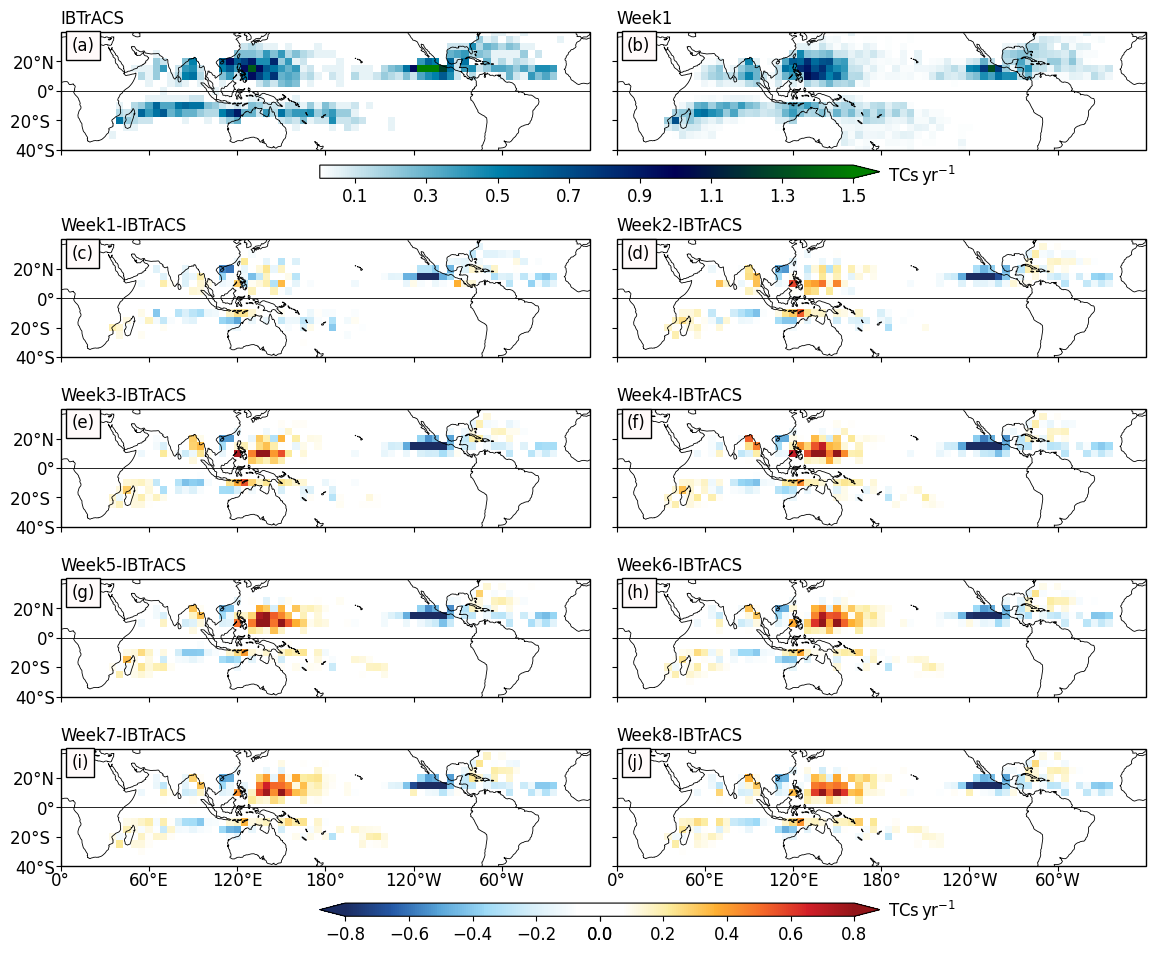

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cartopy.feature as cfeature
import cmaps


lon_min = 0
lon_max = 360
lat_min = -40
lat_max = 40

lat = np.linspace(lat_min, lat_max, 17)  
lon = np.linspace(lon_min, lon_max, 73) 
lon_grid_mesh, lat_grid_mesh = np.meshgrid(lon, lat)

fig, axes = plt.subplots(5, 2, figsize=(14, 12), sharex=False, sharey=False, 
                         subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}, 
                         gridspec_kw={'height_ratios': [1.3, 0.9, 0.9, 0.9, 0.9], 'hspace': 0.00})

ax1, ax2 = axes[0, 0], axes[0, 1]
ax3, ax4 = axes[1, 0], axes[1, 1]
ax5, ax6 = axes[2, 0], axes[2, 1]
ax7, ax8 = axes[3, 0], axes[3, 1]
ax9, ax10 = axes[4, 0], axes[4, 1]

extent = [lon_min, lon_max, lat_min, lat_max]

def format_axis(ax):
    ax.set_extent(extent, crs=ccrs.PlateCarree())  
    ax.add_feature(cfeature.COASTLINE, linewidth=0.6, edgecolor="k")
    ax.add_feature(cfeature.LAND, color="gainsboro")
    ax.add_feature(cfeature.OCEAN, color="white")

    parallels = np.arange(-40, 40, 20)  
    meridians = np.arange(0, 360, 60)  
    ax.set_yticks(parallels, crs=ccrs.PlateCarree())
    ax.set_xticks(meridians, crs=ccrs.PlateCarree())

extent = [lon_min, lon_max, lat_min, lat_max]

def format_axis(ax):
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE, linewidth=0.6, edgecolor="k")
    ax.add_feature(cfeature.LAND, color="gainsboro")
    ax.add_feature(cfeature.OCEAN, color="white")

    parallels = np.arange(-40, 40, 20)  
    meridians = np.arange(0, 360, 60)  
    ax.set_yticks(parallels, crs=ccrs.PlateCarree())
    ax.set_xticks(meridians, crs=ccrs.PlateCarree())
    

data_list = [Obs, week1_gen,
             week1_IBTrACS, week2_IBTrACS,
             week3_IBTrACS, week4_IBTrACS,
             week5_IBTrACS, week6_IBTrACS,
             week7_IBTrACS, week8_IBTrACS]

num_divisions = 80
custom_cmapp = plt.get_cmap('BlueWhiteOrangeRed', num_divisions) #cmap=cmaps.BlueWhiteOrangeRed

for ax, data in zip(axes.flat, data_list):
    format_axis(ax)  
    
    if ax == ax1: 
        pcolormesh_kobs = ax.pcolormesh(lon_grid_mesh, lat_grid_mesh, Obs,
                                        cmap='ocean_r', vmin=0, vmax=1.5, transform=ccrs.PlateCarree())
    elif ax == ax2:  
        pcolormesh_week1 = ax.pcolormesh(lon_grid_mesh, lat_grid_mesh, week1_gen,
                                         cmap='ocean_r', vmin=0, vmax=1.5, transform=ccrs.PlateCarree())
    else:  
        pcolormesh = ax.pcolormesh(lon_grid_mesh, lat_grid_mesh, data,
                                    cmap=custom_cmapp, vmin=-0.8, vmax=0.8, transform=ccrs.PlateCarree()) 

ax9.set_xticklabels(['0°', '60°E', '120°E', '180°', '120°W', '60°W'])
ax10.set_xticklabels(['0°', '60°E', '120°E', '180°', '120°W', '60°W'])


ax9.tick_params(axis='x', labelsize=12, labelcolor='black',pad=0.8)  
ax10.tick_params(axis='x', labelsize=12, labelcolor='black',pad=0.8)  


ax1.set_yticklabels(['40°S', '20°S ', '0°', '20°N'])
ax3.set_yticklabels(['40°S', '20°S ', '0°', '20°N'])
ax5.set_yticklabels(['40°S', '20°S ', '0°', '20°N'])
ax7.set_yticklabels(['40°S', '20°S ', '0°', '20°N'])
ax9.set_yticklabels(['40°S', '20°S ', '0°', '20°N'])
# Optionally, adjust the labels to ensure visibility (font size, position)
ax1.tick_params(axis='y', labelsize=12, labelcolor='black',pad=0.5)  
ax3.tick_params(axis='y', labelsize=12, labelcolor='black',pad=0.5)  
ax5.tick_params(axis='y', labelsize=12, labelcolor='black',pad=0.5) 
ax7.tick_params(axis='y', labelsize=12, labelcolor='black',pad=0.5) 
ax9.tick_params(axis='y', labelsize=12, labelcolor='black',pad=0.5)


# List of axes for the specific conditions
x_axes_to_hide_labels = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
y_axes_to_hide_labels = [ax2,ax4, ax6, ax8, ax10]

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]:

    if ax in x_axes_to_hide_labels:
        ax.tick_params(axis='x', labelsize=0, labelcolor='white')

for ax in [ax2, ax4, ax6, ax8, ax10]:

    if ax not in [ax1, ax5, ax9]:  
        ax.tick_params(axis='y', labelsize=0, labelcolor='white')

axes_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
for i, ax in enumerate(axes_list):
    label = f'({chr(97 + i)})'  
    ax.text(0.02, 0.84, label, transform=ax.transAxes, fontsize=12, color='k', 
            bbox=dict(facecolor='snow', alpha=1, edgecolor='k'))


ax1.axhline(0, color='k', linewidth=0.6)  
ax2.axhline(0, color='k', linewidth=0.6) 
ax3.axhline(0, color='k', linewidth=0.6) 
ax4.axhline(0, color='k', linewidth=0.6) 
ax5.axhline(0, color='k', linewidth=0.6) 
ax6.axhline(0, color='k', linewidth=0.6) 
ax7.axhline(0, color='k', linewidth=0.6) 
ax8.axhline(0, color='k', linewidth=0.6) 
ax9.axhline(0, color='k', linewidth=0.6) 
ax10.axhline(0, color='k', linewidth=0.6) 



ax1.set_title('IBTrACS', fontsize=12,loc='left')
ax2.set_title('Week1', fontsize=12,loc='left')
ax3.set_title('Week1-IBTrACS', fontsize=12,loc='left')
ax4.set_title('Week2-IBTrACS', fontsize=12,loc='left')
ax5.set_title('Week3-IBTrACS', fontsize=12,loc='left')
ax6.set_title('Week4-IBTrACS', fontsize=12,loc='left')
ax7.set_title('Week5-IBTrACS', fontsize=12,loc='left')              
ax8.set_title('Week6-IBTrACS', fontsize=12,loc='left')
ax9.set_title('Week7-IBTrACS', fontsize=12,loc='left') 
ax10.set_title('Week8-IBTrACS', fontsize=12,loc='left')

for row in axes:
    for ax in row:
        for spine in ax.spines.values():
            spine.set_linewidth(1)  
    
    
cbar_ax = fig.add_axes([0.31, 0.705, 0.4, 0.011]) 
cbar = fig.colorbar(pcolormesh_kobs, cax=cbar_ax, orientation='horizontal', extend='max', drawedges=False)
cbar.ax.tick_params(labelsize=12)
cbar.set_ticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.1,1.3,1.5])
fig.text(0.74, 0.707, '$\mathrm{TCs\,yr}^{-1}$', ha='center', va='center', rotation='horizontal',fontsize=12)

cbar_axx = fig.add_axes([0.31, 0.09, 0.4, 0.011]) 
cbarr = fig.colorbar(pcolormesh, cax=cbar_axx, orientation='horizontal', extend='both', drawedges=False)
cbarr.ax.tick_params(labelsize=12)
cbarr.set_ticks([-0.8, -0.6, -0.4, -0.2,0,0, 0.2, 0.4,0.6,0.8])
fig.text(0.74, 0.095, '$\mathrm{TCs\,yr}^{-1}$', ha='center', va='center', rotation='horizontal',fontsize=12)

plt.subplots_adjust(wspace=0.05, hspace=0.05)
#plt.savefig('Figures/Figure4.png', dpi=400, bbox_inches='tight')
plt.show()
plt.close(fig)